# Tema 8: Ficheros y módulos (I)
Hasta ahora, hemos escrito programas en los que, cada vez que los ejecutábamos, había que introducir toda la información, y esta se perdía una vez salíamos de ellos. Pero hay una forma de superar esta limitación y conservar información entre distintas ejecuciones de un programa: guardarla en ficheros.

Pero aprender a leer y escribir en ficheros no solo sirve para escribir programas con esas características, sino que también es útil para compartir datos, es decir, para poder trabajar con datos de terceros, o que otros puedan trabajar con los nuestros. Esto es especialmente importante en proyectos de [_open data_](https://es.wikipedia.org/wiki/Datos_abiertos) o [_linked data_](https://es.wikipedia.org/wiki/Datos_enlazados).

Existen dos tipos de ficheros: de texto y binarios. Los primeros se pueden leer y escribir con programas de edición de textos (como Notepad++, el bloc de notas, Sublime, PyCharm, TextMate, etc.). Los segundos almacenan la información en largas secuencias de números que solo tienen sentido para los programas. En este curso vamos a aprender a manejar los primeros.

## Crear ficheros de texto
Vamos a crear un fichero de texto. La forma más fácil es a través de un editor de texto plano. Puedes usar el que quieras, pero si no sabes cuál usar, te recomiendo el Notepad++. Lo más importante es que no utilices un procesador de textos como puede ser el Word del Microsoft Office, WordPad, o el Writer de LibreOffice/OpenOffice.

Escribe unas líneas en tu archivo nuevo. Por ejemplo:

    Muchos años después, frente al pelotón de fusilamiento,
    el coronel Aureliano Buendía había de recordar aquella
    tarde remota en que su padre lo llevó a conocer el hielo.
    Macondo era entonces una aldea de veinte casas de barro y
    cañabrava construidas a la orilla de un río de aguas
    diáfanas que se precipitaban por un lecho de piedras
    pulidas, blancas y enormes como huevos prehistóricos.

Ahora guárdalo como `datos.txt` en la misma carpeta en la que guardes tus archivos .py o .ipynb. Si usas Colab, sube el archivo a la misma carpeta en que tengas los cuadernos y presta atención a la siguiente subsección; si no, puedes saltar directamente a [Abrir ficheros de texto en Python](#Abrir-ficheros-de-texto-en-Python).

### Acceder a archivos en Colab
Si estás usando Colab, tienes que ejecutar estas líneas siempre que vayas a querer acceder a archivos desde un cuaderno:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Al hacerlo, tienen que salirte un enlace y un campo donde escribir como los de la siguiente imagen:

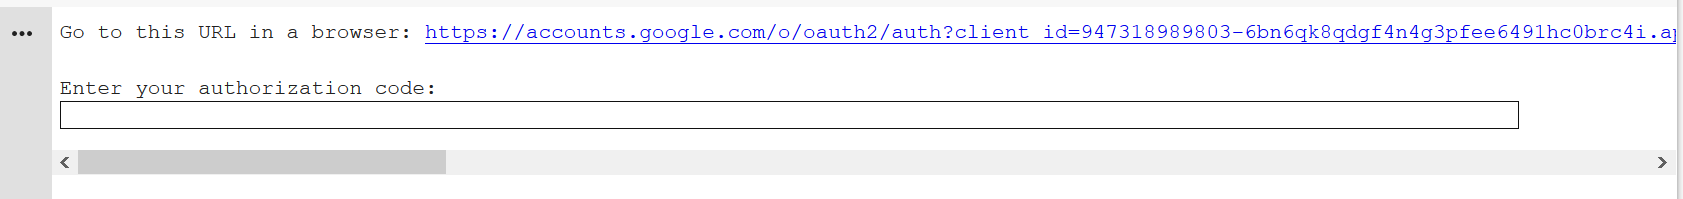

Simplemente, sigue las instrucciones: ve al enlace, copia el código y pégalo en el campo que ha aparecido en tu cuaderno. Ya puedes seguir :)

## Abrir ficheros de texto en Python
Ahora vamos a crear un programa que lea ese archivo. Para ello, lo primero que necesitamos es que el archivo «exista» dentro del programa, es decir, que exista un objeto que lo represente, igual que las variables representan strings, números o booleanos. Eso lo vamos a hacer con la función `open()`, a la que le tenemos que pasar como argumento la ruta o _path_ del archivo entre comillas. También tenemos que guardar su salida en una variable, a la que llamaremos, por ejemplo, `fichero`.

Si estás ejecutando los cuadernos en local o estás trabajando con archivos .py, y has guardado el archivo en la misma carpeta, la ruta será `"datos.txt"`, sin más (hay que poner las comillas porque `open()` requiere un dato de tipo string). Si estás usando Colab y has subido el fichero a la misma carpeta que los cuadernos, la ruta será `"/content/drive/My Drive/Introducción a la programación para humanistas/datos.txt"` (suponiendo que la carpeta se llama "Introducción a la programación para humanistas" y que no está dentro de otra carpeta de tu Drive). En realidad, no hay ningún problema en guardar el fichero en otro sitio que no sea el mismo que el programa que va a acceder a él, pero entonces habría que modificar la ruta. Así que decide bien dónde colocarlo y no lo muevas mucho de ahí.

In [36]:
fichero = open("datos.txt")

Si nos equivocamos con la ruta del fichero, obtendremos un error porque el programa no será capaz de encontrarlo:

In [1]:
fichero_error = open("dato.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'dato.txt'

Ahora podemos comprobar el tipo de objeto que es `fichero` con `type()` y obtendremos `_io.TextIOWrapper`. Esto simplemente es la forma que tiene Python de representar los ficheros.

In [7]:
type(fichero)

_io.TextIOWrapper

## Leer ficheros de texto

Es importante entender que no podemos tratar los objetos de ficheros como si fueran strings, es decir, `print(fichero)` probablemente no se va a comportar como esperas:

In [8]:
print(fichero)

<_io.TextIOWrapper name='datos.txt' mode='r' encoding='cp1252'>


Como ves, nos devuelve la información del fichero, pero no imprime su contenido. En cambio, para acceder a su contenido, nos falta un último paso, que es leerlo. Esto se puede hacer de muchas maneras; vamos a ver aquí las más habituales.

Empecemos por el método `.read()`, cuyo output meteremos en una variable que ya sí será de tipo string y podremos imprimir:

In [9]:
contenido = fichero.read()
print(contenido)

Muchos aÃ±os despuÃ©s, frente al pelotÃ³n de fusilamiento,
el coronel Aureliano BuendÃ­a habÃ­a de recordar aquella
tarde remota en que su padre lo llevÃ³ a conocer el hielo.
Macondo era entonces una aldea de veinte casas de barro y
caÃ±abrava construidas a la orilla de un rÃ­o de aguas
diÃ¡fanas que se precipitaban por un lecho de piedras
pulidas, blancas y enormes como huevos prehistÃ³ricos.


¡Ahora sí! Aunque hay un problema: las tildes y las eñes no se ven bien. Si pasa esto en un texto, indica que hay un problema con la codificación, lo cual casi siempre es un quebradero de cabeza, porque puede deberse al programa que estemos usando para ver el texto (el navegador, el bloc de notas, la terminal...) o a nuestro código.

En este caso, fíjate en que cuando hemos usado `print()` hemos visto en la información del fichero `encoding='cp1252'`, cuando lo deseable es siempre (al menos cuando trabajamos con textos distintos del inglés) usar la codificación utf-8.

Por suerte, podemos arreglarlo. Uno de los parámetros opcionales que admite la función `open()` es `encoding`, y por defecto no es utf-8, así que tenemos que especificárselo de la siguiente manera:

In [15]:
fichero = open("datos.txt", encoding = "UTF-8")
contenido = fichero.read()
print("La codificación de este fichero es", fichero.encoding)
print()
print(contenido)

La codificación de este fichero es UTF-8

Muchos años después, frente al pelotón de fusilamiento,
el coronel Aureliano Buendía había de recordar aquella
tarde remota en que su padre lo llevó a conocer el hielo.
Macondo era entonces una aldea de veinte casas de barro y
cañabrava construidas a la orilla de un río de aguas
diáfanas que se precipitaban por un lecho de piedras
pulidas, blancas y enormes como huevos prehistóricos.


Perfecto. Fíjate en que en la tercera línea estamos imprimiendo solo la información de `fichero` que nos interesa, en ese caso, la que está bajo la clave `encoding`, separándolo con un punto del objeto al que pertenece. Se parece a cómo llamamos a los métodos, pero es distinto en que no necesita un paréntesis al final.
## Cerrar ficheros de texto
Ahora, antes de terminar, todavía nos queda por hacer algo muy importante: cerrar el archivo. Sí, en el código también hay que cerrar las cosas después de abrirlas. Y es importante, porque si se quedan abiertas gastan recursos innecesariamente.

Para cerrar un fichero usaremos el método `.close()`.

In [16]:
fichero.close()

## Leer ficheros de texto línea por línea
Otra forma de leer ficheros es hacerlo línea por línea, es decir, después de volcar su contenido en una variable con `read()` podemos usar `.splitlines()` para que nos devuelva, en vez de una string, una lista, con tantos elementos como líneas tenía el fichero:

In [31]:
fichero = open("datos.txt", encoding="UTF-8")
contenido = fichero.read()
fichero.close() # cerramos el fichero porque ya hemos volcado su contenido en una variable

lineas = contenido.splitlines()
print(lineas)

['Muchos años después, frente al pelotón de fusilamiento,', 'el coronel Aureliano Buendía había de recordar aquella', 'tarde remota en que su padre lo llevó a conocer el hielo.', 'Macondo era entonces una aldea de veinte casas de barro y', 'cañabrava construidas a la orilla de un río de aguas', 'diáfanas que se precipitaban por un lecho de piedras', 'pulidas, blancas y enormes como huevos prehistóricos.']


Pero podemos leerlo directamente como una lista en un solo paso, usando `.readlines()` sobre el fichero:

In [32]:
fichero = open("datos.txt", encoding="UTF-8")
lineas2 = fichero.readlines()
fichero.close()

print(lineas2)

['Muchos años después, frente al pelotón de fusilamiento,\n', 'el coronel Aureliano Buendía había de recordar aquella\n', 'tarde remota en que su padre lo llevó a conocer el hielo.\n', 'Macondo era entonces una aldea de veinte casas de barro y\n', 'cañabrava construidas a la orilla de un río de aguas\n', 'diáfanas que se precipitaban por un lecho de piedras\n', 'pulidas, blancas y enormes como huevos prehistóricos.']


### Caracteres de salto de línea
Fíjate en que usar `.splitlines()` hace que se eliminen del final de las líneas los caracteres de salto de línea (`\n`). Sin embargo, `.readlines()` mete directamente lo que encuentra en cada línea, incluido el salto. Por tanto, si intentamos imprimir cada una de las listas de forma "bonita" (recorriendo cada elemento e imprimiéndolo, no imprimiéndolo como una lista como hemos hecho antes), habrá una gran diferencia:

In [34]:
print("Usando read() y .splitlines():")
print()
for linea in lineas:
    print(linea)

print()
print("Usando .readlines():")
print()
for linea in lineas2:
    print(linea)

Usando read() y .splitlines():

Muchos años después, frente al pelotón de fusilamiento,
el coronel Aureliano Buendía había de recordar aquella
tarde remota en que su padre lo llevó a conocer el hielo.
Macondo era entonces una aldea de veinte casas de barro y
cañabrava construidas a la orilla de un río de aguas
diáfanas que se precipitaban por un lecho de piedras
pulidas, blancas y enormes como huevos prehistóricos.

Usando .readlines()

Muchos años después, frente al pelotón de fusilamiento,

el coronel Aureliano Buendía había de recordar aquella

tarde remota en que su padre lo llevó a conocer el hielo.

Macondo era entonces una aldea de veinte casas de barro y

cañabrava construidas a la orilla de un río de aguas

diáfanas que se precipitaban por un lecho de piedras

pulidas, blancas y enormes como huevos prehistóricos.


Pero podemos arreglarlo fácilmente con `.strip()`:

In [36]:
for linea in lineas2:
    print(linea.strip())

Muchos años después, frente al pelotón de fusilamiento,
el coronel Aureliano Buendía había de recordar aquella
tarde remota en que su padre lo llevó a conocer el hielo.
Macondo era entonces una aldea de veinte casas de barro y
cañabrava construidas a la orilla de un río de aguas
diáfanas que se precipitaban por un lecho de piedras
pulidas, blancas y enormes como huevos prehistóricos.


Al leer texto e imprimirlo siempre hay que tener cuidado con los saltos de línea: son caracteres que no vemos, pero que están ahí siempre que hay separación en líneas, y que obviamente el programa sí ve y lee. El problema es que `print()` está hecho para imprimir bonito para humanos, así que cada cosa que imprime (por ejemplo, un elemento de un bucle), la separa por un salto de línea. Además, cuando encuentra un carácter de salto de línea, lo interpreta y lo ejecuta, lo cual puede hacer que se junten los dos saltos. Simplemente, ten en cuenta que esto puede pasar y prepárate para arreglarlo.

Pero volviendo a las maneras de leer un fichero, trabajar así puede ser un poco problemático. Tanto con `read()` como con `.readlines()` estamos cargando todo el contenido del archivo en memoria, y esto puede valernos cuando trabajamos con archivos pequeños, pero en cuanto manejemos volúmenes más grandes de datos el código tardará demasiado en ejecutarse.

Por suerte, los ficheros son objetos iterables, así que los podemos recorrer con un `for`:

In [23]:
fichero = open("datos.txt", encoding = "UTF-8")
for linea in fichero:
    print(linea.strip()) # eliminamos el carácter de salto de línea
fichero.close()

Muchos años después, frente al pelotón de fusilamiento,
el coronel Aureliano Buendía había de recordar aquella
tarde remota en que su padre lo llevó a conocer el hielo.
Macondo era entonces una aldea de veinte casas de barro y
cañabrava construidas a la orilla de un río de aguas
diáfanas que se precipitaban por un lecho de piedras
pulidas, blancas y enormes como huevos prehistóricos.


Puede que te preguntes por qué hay tantas formas distintas de leer un fichero. En programación te vas a encontrar todo el rato con que hay muchas formas de hacer lo mismo, pero siempre se diferencian en algún detalle y eso nos va a permitir elegir una para cada ocasión, según nos convenga.

## Abrir ficheros con `with ... as`
Finalmente, existe una forma rápida de abrir ficheros en Python que consiste en usar las instrucciones `with` y `as`. La principal diferencia y la causa de que sea rápida es que no hace falta cerrar después el archivo, porque ya lo hace Python. Además, el esquema cambia ligeramente:

    with open(ruta) as nombre_del_fichero:
        <instrucciones sobre el fichero>

Por ejemplo:

In [2]:
with open("datos.txt", encoding="UTF-8") as fichero:
    for linea in fichero:
        print(linea.strip())

Muchos años después, frente al pelotón de fusilamiento,
el coronel Aureliano Buendía había de recordar aquella
tarde remota en que su padre lo llevó a conocer el hielo.
Macondo era entonces una aldea de veinte casas de barro y
cañabrava construidas a la orilla de un río de aguas
diáfanas que se precipitaban por un lecho de piedras
pulidas, blancas y enormes como huevos prehistóricos.


En vez de guardar lo que sale de `open()` en una variable con el operador de asignación (`=`), lo hacemos con `with` y `as` (que se parece bastante más al lenguaje natural).

Como hemos visto, muchas veces solo abrimos el fichero para cargarlo en una variable y a partir de ahí trabajar con él, así que enseguida lo cerrábamos. Por eso se inventó esta manera de abrir archivos. Por supuesto, no es recomendable si vamos a necesitar que el fichero siga abierto para continuar leyendo o escribiendo en él.

## Ejercicios
### 080101
Modifica la función `fichero_a_lista` para que:

1. en vez de usar `open()` y `.close()`, use `with ... as`
2. en vez de recorrer el fichero con un `for`, use `read()` y `.splitlines()`

Comprueba que has hecho bien cada modificación ejecutando de nuevo la celda; debería salir el mismo texto.

In [8]:
def fichero_a_lista(ruta):
    # Convierte las líneas de un fichero de texto en elementos de una lista y devuelve la lista
    lista_de_lineas = []
    fichero = open(ruta, encoding="UTF-8")
    for linea in fichero:
        lista_de_lineas.append(linea.strip())
    fichero.close()
    return lista_de_lineas

# Programa
lista = fichero_a_lista("datos.txt")
for elemento in lista:
    print(elemento)

Muchos años después, frente al pelotón de fusilamiento,
el coronel Aureliano Buendía había de recordar aquella
tarde remota en que su padre lo llevó a conocer el hielo.
Macondo era entonces una aldea de veinte casas de barro y
cañabrava construidas a la orilla de un río de aguas
diáfanas que se precipitaban por un lecho de piedras
pulidas, blancas y enormes como huevos prehistóricos.


### 080102
Vamos a hacer algo más que imprimir por pantalla los ficheros que abramos. Podemos convertir un texto en una lista de líneas para contar, por ejemplo, la longitud de cada línea en caracteres o en palabras (atención, en la siguiente celda reutilizaremos la función `fichero_a_lista` del ejercicio anterior):

In [9]:
def num_caracteres(lista):
    # Devuelve una lista con la longitud, en caracteres, de las líneas de una lista
    caracteres_por_linea = []
    for elemento in lista:
        caracteres_por_linea.append(len(elemento)) # Contamos los caracteres en cada línea y metemos cada resultado en una lista
    return caracteres_por_linea

def num_palabras(lista):
    # Devuelve una lista con la longitud, en palabras, de las líneas de una lista
    palabras_por_linea = []
    for elemento in lista:
        lista_de_palabras = elemento.split() # Convertimos cada línea en una lista de palabras
        palabras_por_linea.append(len(lista_de_palabras)) # Contamos las palabras en cada línea y metemos cada resultado en una lista
    return palabras_por_linea

def estadisticas_fichero(ruta):
    # Saca las estadísticas de caracteres y palabras por línea de un fichero
    lineas = fichero_a_lista(ruta)
    print("Estadísticas del fichero", ruta) # Imprimimos un cabecero
    print("-" * 60)
    palabras = num_palabras(lineas) # Creamos una lista con el número de palabras por línea
    caracteres = num_caracteres(lineas) # Creamos una lista con el número de caracteres por línea
    i = 1 # Creamos un índice para poder usarlo al imprimir el número de cada línea
    for linea in lineas:
        print("Línea", i)
        print("Contenido:", linea)
        print("Número de palabras:", palabras[i-1]) # Restamos 1 al índice, porque Python empieza a contar por el 0
        print("Número de caracteres:", caracteres[i-1])
        i = i + 1 # Al final, añadimos 1 al índice para que se imprima bien el número de línea y se consulten las posiciones correctas de las líneas

# Programa
ruta = "datos.txt"
estadisticas_fichero(ruta)

Estadísticas del fichero datos.txt
------------------------------------------------------------
Línea 1
Contenido: Muchos años después, frente al pelotón de fusilamiento,
Número de palabras: 8
Número de caracteres: 55
Línea 2
Contenido: el coronel Aureliano Buendía había de recordar aquella
Número de palabras: 8
Número de caracteres: 54
Línea 3
Contenido: tarde remota en que su padre lo llevó a conocer el hielo.
Número de palabras: 12
Número de caracteres: 57
Línea 4
Contenido: Macondo era entonces una aldea de veinte casas de barro y
Número de palabras: 11
Número de caracteres: 57
Línea 5
Contenido: cañabrava construidas a la orilla de un río de aguas
Número de palabras: 10
Número de caracteres: 52
Línea 6
Contenido: diáfanas que se precipitaban por un lecho de piedras
Número de palabras: 9
Número de caracteres: 52
Línea 7
Contenido: pulidas, blancas y enormes como huevos prehistóricos.
Número de palabras: 7
Número de caracteres: 53


Ahora crea otro fichero de texto y modifica solo la ruta en la línea 32, para que el programa haga lo mismo pero con el nuevo fichero.

### 080103
Guarda en un archivo `temperaturas.txt` el siguiente texto:

    17
    20
    20
    21
    20
    22
    18

Define una función `lee_temperaturas()` que:
- reciba como argumento una ruta de fichero
- cree una lista vacía llamada `valores`
- abra el fichero con `open()`
- recorra el fichero línea por línea
- convierta cada línea en un número entero y la guarde en una variable `valor`
- añada `valor` a `valores`
- cierre el fichero
- devuelva `valores`

Comprueba que el programa te ha salido bien ejecutando este código:

In [4]:
temperaturas = lee_temperaturas("temperaturas.txt")
print("Temperaturas:")
for t in temperaturas:
    print(t)

Temperaturas:
17
20
20
21
20
22
18


El output esperado es:

    Temperaturas:
    17
    20
    20
    21
    20
    22
    18